In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.read_gml("data/newman-karate.gml", label="id")

In [7]:
print(G.number_of_nodes())
print(G.number_of_edges())

34
78


In [3]:
dict(G.degree())

{1: 16,
 2: 9,
 3: 10,
 4: 6,
 5: 3,
 6: 4,
 7: 4,
 8: 4,
 9: 5,
 10: 2,
 11: 3,
 12: 1,
 13: 2,
 14: 5,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 3,
 21: 2,
 22: 2,
 23: 2,
 24: 5,
 25: 3,
 26: 3,
 27: 2,
 28: 4,
 29: 3,
 30: 4,
 31: 4,
 32: 6,
 33: 12,
 34: 17}

In [4]:
B = nx.betweenness_centrality(G, endpoints=True)
B

{1: 0.4707155589508531,
 2: 0.1095874713521772,
 3: 0.19402993520640582,
 4: 0.07003225532637297,
 5: 0.059417706476530004,
 6: 0.08704693998811645,
 7: 0.08704693998811644,
 8: 0.058823529411764705,
 9: 0.111460543813485,
 10: 0.05962142432730668,
 11: 0.05941770647653,
 12: 0.058823529411764705,
 13: 0.058823529411764705,
 14: 0.10198907845966672,
 15: 0.058823529411764705,
 16: 0.058823529411764705,
 17: 0.058823529411764705,
 18: 0.058823529411764705,
 19: 0.058823529411764705,
 20: 0.08938828056475116,
 21: 0.058823529411764705,
 22: 0.058823529411764705,
 23: 0.058823529411764705,
 24: 0.07540106951871657,
 25: 0.06090314913844326,
 26: 0.06243810655575361,
 27: 0.058823529411764705,
 28: 0.07984325043148571,
 29: 0.06051268992445463,
 30: 0.06157372039724981,
 31: 0.07238774297597828,
 32: 0.18896528308293015,
 33: 0.19552669552669552,
 34: 0.34501174207056556}

In [5]:
B_arr = np.array([B[i + 1] for i in range(G.number_of_nodes())])
labels_dict = dict(zip(list(G.nodes), list(G.nodes)))

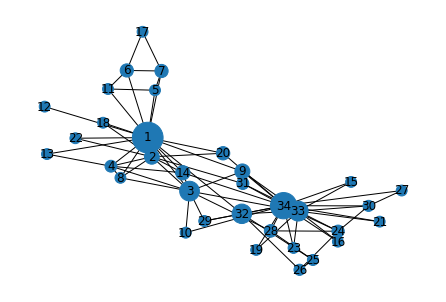

In [6]:
nx.draw(G, labels=labels_dict, node_size=B_arr*2000)
plt.show()

In [8]:
#
# json output
#

json_nodes = []

for n in G.nodes():
    json_nodes.append({
        "id": n,
        "betweenness": B[n]
    })
    
json_links = []

for src, trg in G.edges():    
    json_links.append({
        "source": src,
        "target": trg
    })
    
G_json = {
    "nodes": json_nodes,
    "links": json_links
}

In [9]:
with open("data/graph.json", "w") as fout:
    json.dump(G_json, fout, indent=2)